In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
import seaborn as sns
from keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
import quandl

Using TensorFlow backend.


In [2]:
quandl.ApiConfig.api_key = '_66tvRgY5_szTgfB7aeB'
df = quandl.get('BITSTAMP/USD')
data = df


In [3]:
data.reset_index()

,Date,High,Low,Last,Bid,Ask,Volume,VWAP
0,2014-04-15,515.00,453.16,499.01,500.01,505.04,28535.844106,491.41
1,2014-04-16,548.00,494.02,534.00,535.01,536.00,31159.941300,520.21
2,2014-04-17,537.24,481.63,506.52,504.70,505.38,21126.375080,504.83
3,2014-04-18,508.43,470.00,487.00,484.14,487.00,11879.484756,485.72
4,2014-04-19,507.43,472.81,504.74,504.74,505.00,10262.195861,492.22
...,...,...,...,...,...,...,...,...
2391,2020-11-27,18911.04,16218.00,17168.31,17168.31,17170.24,21424.968235,17151.05
2392,2020-11-28,17471.89,16435.47,17154.39,17146.55,17156.24,8964.826911,16941.50
2393,2020-11-29,17896.03,16875.01,17741.79,17728.25,17737.49,4471.522025,17411.32
2394,2020-11-30,18352.47,17534.87,18192.03,18194.28,18196.75,3736.159179,18038.28


In [4]:
test = data.tail(30)

In [5]:
High = test.High.values
Low = test.Low.values
Volume = test.Volume.values
Last = test.Last.values

In [6]:
X = []
y = []

for i in range(len(High)):
    row = []
    yrow = []
    row.append(High[i])
    row.append(Low[i])
    #     row.append(Volume[i])
    yrow.append(Last[i])
    X.append(row)
    y.append(yrow)
X = np.array(X)
y = np.array(y)
X

array([[13907.47, 13629.31],
       [13842.5 , 13220.  ],
       [14083.76, 13287.7 ],
       [14277.5 , 13520.87],
       [15770.58, 14100.  ],
       [15968.98, 15196.01],
       [15778.6 , 14351.  ],
       [15664.9 , 14727.19],
       [15854.48, 14824.66],
       [15482.76, 15092.47],
       [15991.01, 15290.85],
       [16369.99, 15481.  ],
       [16494.52, 15970.33],
       [16341.89, 15715.1 ],
       [16170.  , 15786.46],
       [16894.93, 15875.5 ],
       [17868.  , 16570.  ],
       [18483.  , 17041.47],
       [18189.97, 17346.62],
       [18824.88, 17755.81],
       [18977.  , 18333.45],
       [18770.55, 17600.  ],
       [18786.31, 18001.95],
       [19442.13, 18068.56],
       [19490.  , 18470.91],
       [18911.04, 16218.  ],
       [17471.89, 16435.47],
       [17896.03, 16875.01],
       [18352.47, 17534.87],
       [19864.15, 18207.12]])

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
model = tf.keras.Sequential([
    layers.Dense(50, activation='relu', input_dim=2),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(units=1)
    ])

In [9]:
 model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.0001),
    loss='mean_absolute_error', metrics=['accuracy'])

In [10]:
history = model.fit(
    X_train, y_train,
    epochs=700,
        # suppress logging
    verbose=2,
        # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Train on 19 samples, validate on 5 samples
Epoch 1/700
19/19 - 1s - loss: 16898.4922 - accuracy: 0.0000e+00 - val_loss: 15840.7578 - val_accuracy: 0.0000e+00
Epoch 2/700
19/19 - 0s - loss: 16841.1660 - accuracy: 0.0000e+00 - val_loss: 15787.0254 - val_accuracy: 0.0000e+00
Epoch 3/700
19/19 - 0s - loss: 16784.0059 - accuracy: 0.0000e+00 - val_loss: 15733.4639 - val_accuracy: 0.0000e+00
Epoch 4/700
19/19 - 0s - loss: 16727.0059 - accuracy: 0.0000e+00 - val_loss: 15684.0781 - val_accuracy: 0.0000e+00
Epoch 5/700
19/19 - 0s - loss: 16674.5508 - accuracy: 0.0000e+00 - val_loss: 15637.9502 - val_accuracy: 0.0000e+00
Epoch 6/700
19/19 - 0s - loss: 16625.4375 - accuracy: 0.0000e+00 - val_loss: 15592.1621 - val_accuracy: 0.0000e+00
Epoch 7/700
19/19 - 0s - loss: 16579.0898 - accuracy: 0.0000e+00 - val_loss: 15552.8457 - val_accuracy: 0.0000e+00
Epoch 8/700
19/19 - 0s - loss: 16539.0957 - accuracy: 0.0000e+00 - val_loss: 15516.7842 - val_accuracy: 0.0000e+00
Epoch 9/700
19/19 - 0s - loss: 16501.

Epoch 72/700
19/19 - 0s - loss: 14171.7480 - accuracy: 0.0000e+00 - val_loss: 13284.2246 - val_accuracy: 0.0000e+00
Epoch 73/700
19/19 - 0s - loss: 14128.6152 - accuracy: 0.0000e+00 - val_loss: 13242.7686 - val_accuracy: 0.0000e+00
Epoch 74/700
19/19 - 0s - loss: 14084.5889 - accuracy: 0.0000e+00 - val_loss: 13200.6426 - val_accuracy: 0.0000e+00
Epoch 75/700
19/19 - 0s - loss: 14040.0859 - accuracy: 0.0000e+00 - val_loss: 13159.0000 - val_accuracy: 0.0000e+00
Epoch 76/700
19/19 - 0s - loss: 13996.6182 - accuracy: 0.0000e+00 - val_loss: 13118.6826 - val_accuracy: 0.0000e+00
Epoch 77/700
19/19 - 0s - loss: 13954.1807 - accuracy: 0.0000e+00 - val_loss: 13078.7588 - val_accuracy: 0.0000e+00
Epoch 78/700
19/19 - 0s - loss: 13911.4404 - accuracy: 0.0000e+00 - val_loss: 13038.4941 - val_accuracy: 0.0000e+00
Epoch 79/700
19/19 - 0s - loss: 13868.2617 - accuracy: 0.0000e+00 - val_loss: 12998.1973 - val_accuracy: 0.0000e+00
Epoch 80/700
19/19 - 0s - loss: 13824.5557 - accuracy: 0.0000e+00 - val_

Epoch 143/700
19/19 - 0s - loss: 9684.1270 - accuracy: 0.0000e+00 - val_loss: 9023.8535 - val_accuracy: 0.0000e+00
Epoch 144/700
19/19 - 0s - loss: 9589.3408 - accuracy: 0.0000e+00 - val_loss: 8933.4355 - val_accuracy: 0.0000e+00
Epoch 145/700
19/19 - 0s - loss: 9493.0908 - accuracy: 0.0000e+00 - val_loss: 8842.0234 - val_accuracy: 0.0000e+00
Epoch 146/700
19/19 - 0s - loss: 9395.7002 - accuracy: 0.0000e+00 - val_loss: 8749.7637 - val_accuracy: 0.0000e+00
Epoch 147/700
19/19 - 0s - loss: 9297.3984 - accuracy: 0.0000e+00 - val_loss: 8655.9434 - val_accuracy: 0.0000e+00
Epoch 148/700
19/19 - 0s - loss: 9197.5273 - accuracy: 0.0000e+00 - val_loss: 8560.7139 - val_accuracy: 0.0000e+00
Epoch 149/700
19/19 - 0s - loss: 9096.2637 - accuracy: 0.0000e+00 - val_loss: 8464.5908 - val_accuracy: 0.0000e+00
Epoch 150/700
19/19 - 0s - loss: 8993.9072 - accuracy: 0.0000e+00 - val_loss: 8367.1465 - val_accuracy: 0.0000e+00
Epoch 151/700
19/19 - 0s - loss: 8890.0996 - accuracy: 0.0000e+00 - val_loss: 82

Epoch 215/700
19/19 - 0s - loss: 607.9622 - accuracy: 0.0000e+00 - val_loss: 510.8455 - val_accuracy: 0.0000e+00
Epoch 216/700
19/19 - 0s - loss: 567.6621 - accuracy: 0.0000e+00 - val_loss: 453.4930 - val_accuracy: 0.0000e+00
Epoch 217/700
19/19 - 0s - loss: 512.3667 - accuracy: 0.0000e+00 - val_loss: 380.5637 - val_accuracy: 0.0000e+00
Epoch 218/700
19/19 - 0s - loss: 442.0426 - accuracy: 0.0000e+00 - val_loss: 294.0953 - val_accuracy: 0.0000e+00
Epoch 219/700
19/19 - 0s - loss: 368.2350 - accuracy: 0.0000e+00 - val_loss: 198.4734 - val_accuracy: 0.0000e+00
Epoch 220/700
19/19 - 0s - loss: 293.2484 - accuracy: 0.0000e+00 - val_loss: 123.7312 - val_accuracy: 0.0000e+00
Epoch 221/700
19/19 - 0s - loss: 253.2824 - accuracy: 0.0000e+00 - val_loss: 119.1273 - val_accuracy: 0.0000e+00
Epoch 222/700
19/19 - 0s - loss: 239.3032 - accuracy: 0.0000e+00 - val_loss: 141.3154 - val_accuracy: 0.0000e+00
Epoch 223/700
19/19 - 0s - loss: 226.0274 - accuracy: 0.0000e+00 - val_loss: 195.5049 - val_accu

Epoch 288/700
19/19 - 0s - loss: 220.9361 - accuracy: 0.0000e+00 - val_loss: 175.3590 - val_accuracy: 0.0000e+00
Epoch 289/700
19/19 - 0s - loss: 220.6789 - accuracy: 0.0000e+00 - val_loss: 172.3309 - val_accuracy: 0.0000e+00
Epoch 290/700
19/19 - 0s - loss: 220.5194 - accuracy: 0.0000e+00 - val_loss: 169.9496 - val_accuracy: 0.0000e+00
Epoch 291/700
19/19 - 0s - loss: 220.6031 - accuracy: 0.0000e+00 - val_loss: 168.1519 - val_accuracy: 0.0000e+00
Epoch 292/700
19/19 - 0s - loss: 220.6587 - accuracy: 0.0000e+00 - val_loss: 166.8795 - val_accuracy: 0.0000e+00
Epoch 293/700
19/19 - 0s - loss: 220.6967 - accuracy: 0.0000e+00 - val_loss: 166.0816 - val_accuracy: 0.0000e+00
Epoch 294/700
19/19 - 0s - loss: 220.7279 - accuracy: 0.0000e+00 - val_loss: 165.7146 - val_accuracy: 0.0000e+00
Epoch 295/700
19/19 - 0s - loss: 220.7429 - accuracy: 0.0000e+00 - val_loss: 165.7379 - val_accuracy: 0.0000e+00
Epoch 296/700
19/19 - 0s - loss: 220.7368 - accuracy: 0.0000e+00 - val_loss: 166.1119 - val_accu

Epoch 361/700
19/19 - 0s - loss: 220.4385 - accuracy: 0.0000e+00 - val_loss: 172.5094 - val_accuracy: 0.0000e+00
Epoch 362/700
19/19 - 0s - loss: 220.4061 - accuracy: 0.0000e+00 - val_loss: 173.7672 - val_accuracy: 0.0000e+00
Epoch 363/700
19/19 - 0s - loss: 220.3741 - accuracy: 0.0000e+00 - val_loss: 173.2352 - val_accuracy: 0.0000e+00
Epoch 364/700
19/19 - 0s - loss: 220.3742 - accuracy: 0.0000e+00 - val_loss: 173.1562 - val_accuracy: 0.0000e+00
Epoch 365/700
19/19 - 0s - loss: 220.3783 - accuracy: 0.0000e+00 - val_loss: 173.4844 - val_accuracy: 0.0000e+00
Epoch 366/700
19/19 - 0s - loss: 220.3628 - accuracy: 0.0000e+00 - val_loss: 174.1824 - val_accuracy: 0.0000e+00
Epoch 367/700
19/19 - 0s - loss: 220.4299 - accuracy: 0.0000e+00 - val_loss: 173.1385 - val_accuracy: 0.0000e+00
Epoch 368/700
19/19 - 0s - loss: 220.3729 - accuracy: 0.0000e+00 - val_loss: 172.5994 - val_accuracy: 0.0000e+00
Epoch 369/700
19/19 - 0s - loss: 220.3900 - accuracy: 0.0000e+00 - val_loss: 172.5168 - val_accu

Epoch 434/700
19/19 - 0s - loss: 220.3077 - accuracy: 0.0000e+00 - val_loss: 173.5793 - val_accuracy: 0.0000e+00
Epoch 435/700
19/19 - 0s - loss: 220.2758 - accuracy: 0.0000e+00 - val_loss: 172.8701 - val_accuracy: 0.0000e+00
Epoch 436/700
19/19 - 0s - loss: 220.2844 - accuracy: 0.0000e+00 - val_loss: 172.6756 - val_accuracy: 0.0000e+00
Epoch 437/700
19/19 - 0s - loss: 220.2913 - accuracy: 0.0000e+00 - val_loss: 172.9498 - val_accuracy: 0.0000e+00
Epoch 438/700
19/19 - 0s - loss: 220.2779 - accuracy: 0.0000e+00 - val_loss: 173.6438 - val_accuracy: 0.0000e+00
Epoch 439/700
19/19 - 0s - loss: 220.2821 - accuracy: 0.0000e+00 - val_loss: 172.4053 - val_accuracy: 0.0000e+00
Epoch 440/700
19/19 - 0s - loss: 220.2966 - accuracy: 0.0000e+00 - val_loss: 171.7346 - val_accuracy: 0.0000e+00
Epoch 441/700
19/19 - 0s - loss: 220.3176 - accuracy: 0.0000e+00 - val_loss: 171.5840 - val_accuracy: 0.0000e+00
Epoch 442/700
19/19 - 0s - loss: 220.3261 - accuracy: 0.0000e+00 - val_loss: 171.9035 - val_accu

Epoch 507/700
19/19 - 0s - loss: 220.2275 - accuracy: 0.0000e+00 - val_loss: 172.8193 - val_accuracy: 0.0000e+00
Epoch 508/700
19/19 - 0s - loss: 220.1735 - accuracy: 0.0000e+00 - val_loss: 172.4543 - val_accuracy: 0.0000e+00
Epoch 509/700
19/19 - 0s - loss: 220.1866 - accuracy: 0.0000e+00 - val_loss: 172.6060 - val_accuracy: 0.0000e+00
Epoch 510/700
19/19 - 0s - loss: 220.1759 - accuracy: 0.0000e+00 - val_loss: 173.2326 - val_accuracy: 0.0000e+00
Epoch 511/700
19/19 - 0s - loss: 220.1529 - accuracy: 0.0000e+00 - val_loss: 174.2871 - val_accuracy: 0.0000e+00
Epoch 512/700
19/19 - 0s - loss: 220.2977 - accuracy: 0.0000e+00 - val_loss: 173.1936 - val_accuracy: 0.0000e+00
Epoch 513/700
19/19 - 0s - loss: 220.1511 - accuracy: 0.0000e+00 - val_loss: 172.6994 - val_accuracy: 0.0000e+00
Epoch 514/700
19/19 - 0s - loss: 220.1667 - accuracy: 0.0000e+00 - val_loss: 172.7469 - val_accuracy: 0.0000e+00
Epoch 515/700
19/19 - 0s - loss: 220.1643 - accuracy: 0.0000e+00 - val_loss: 173.2893 - val_accu

Epoch 580/700
19/19 - 0s - loss: 220.1813 - accuracy: 0.0000e+00 - val_loss: 169.0418 - val_accuracy: 0.0000e+00
Epoch 581/700
19/19 - 0s - loss: 220.1844 - accuracy: 0.0000e+00 - val_loss: 169.3650 - val_accuracy: 0.0000e+00
Epoch 582/700
19/19 - 0s - loss: 220.1702 - accuracy: 0.0000e+00 - val_loss: 170.1961 - val_accuracy: 0.0000e+00
Epoch 583/700
19/19 - 0s - loss: 220.1381 - accuracy: 0.0000e+00 - val_loss: 171.4805 - val_accuracy: 0.0000e+00
Epoch 584/700
19/19 - 0s - loss: 220.0911 - accuracy: 0.0000e+00 - val_loss: 173.1701 - val_accuracy: 0.0000e+00
Epoch 585/700
19/19 - 0s - loss: 220.0517 - accuracy: 0.0000e+00 - val_loss: 172.4551 - val_accuracy: 0.0000e+00
Epoch 586/700
19/19 - 0s - loss: 220.0521 - accuracy: 0.0000e+00 - val_loss: 172.3479 - val_accuracy: 0.0000e+00
Epoch 587/700
19/19 - 0s - loss: 220.0561 - accuracy: 0.0000e+00 - val_loss: 172.7834 - val_accuracy: 0.0000e+00
Epoch 588/700
19/19 - 0s - loss: 220.0379 - accuracy: 0.0000e+00 - val_loss: 173.7135 - val_accu

Epoch 653/700
19/19 - 0s - loss: 219.9725 - accuracy: 0.0000e+00 - val_loss: 171.3147 - val_accuracy: 0.0000e+00
Epoch 654/700
19/19 - 0s - loss: 219.9742 - accuracy: 0.0000e+00 - val_loss: 171.7811 - val_accuracy: 0.0000e+00
Epoch 655/700
19/19 - 0s - loss: 219.9518 - accuracy: 0.0000e+00 - val_loss: 172.7797 - val_accuracy: 0.0000e+00
Epoch 656/700
19/19 - 0s - loss: 219.9194 - accuracy: 0.0000e+00 - val_loss: 174.2615 - val_accuracy: 0.0000e+00
Epoch 657/700
19/19 - 0s - loss: 220.1280 - accuracy: 0.0000e+00 - val_loss: 173.1984 - val_accuracy: 0.0000e+00
Epoch 658/700
19/19 - 0s - loss: 219.9699 - accuracy: 0.0000e+00 - val_loss: 169.8195 - val_accuracy: 0.0000e+00
Epoch 659/700
19/19 - 0s - loss: 220.0176 - accuracy: 0.0000e+00 - val_loss: 167.3533 - val_accuracy: 0.0000e+00
Epoch 660/700
19/19 - 0s - loss: 220.0982 - accuracy: 0.0000e+00 - val_loss: 165.7131 - val_accuracy: 0.0000e+00
Epoch 661/700
19/19 - 0s - loss: 220.1599 - accuracy: 0.0000e+00 - val_loss: 164.8203 - val_accu

In [12]:
predict = model.predict(X)
predictions = pd.DataFrame(data=predict, columns=['predicitons'])
labels = pd.DataFrame(data=y, columns=['labels'])


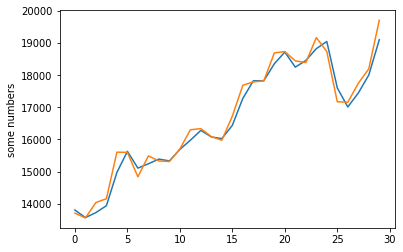

In [13]:
plt.plot(predict)
plt.plot(y)
plt.ylabel('some numbers')
plt.show()
predictions.to_csv('predictions.csv')
labels.to_csv('actual_values.csv')


In [14]:
label_df = pd.read_csv('resources/actual_values.csv')
predata_df = pd.read_csv('resources/predictions.csv')

l_data = label_df.labels.values
p_data = predata_df.predicitons.values
p_data = p_data.tolist()
l_data = l_data.tolist()

FileNotFoundError: [Errno 2] No such file or directory: 'resources/actual_values.csv'

In [ ]:
json = {}
json['predcitions'] = p_data
json['labels'] = l_data


In [ ]:
print(json)